In [1]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from joblib import dump
from joblib import load

import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data4.csv')
df = df.drop(df.index[0])
df

,id,Bulan,No.,No_laporan,Tanggal_laporan,Tanggal_penilaian,NO_SP,Tanggal_SP,Nama_debitur,Nama_Pemberi_Tugas,...,ppn,Indikasi_nilai,Kesimpulan_nilai,Report,Titik_koordinat,Nama,Jumlah_kamar,Jumlah_kamarmandi,Jumlah_lantai,Pusat_kota
1,37,Juni,37,00173/2.0045-02/PI/07/PS.0205/1/VI/2021,21 Juni 2021,05 Mei 2021,130402.02-PNR/SIG-MLG/AIG/IV/21,13 April 2021,Mohamad Romli,PT. Bank Negara Indonesia (Persero) Tbk.,...,350000,1000000,1692200000,Long Report,"-8.434607, 114.338428",MUHAMAD ROMLI,1,1,2,PinggirKota
2,22,Juni,22,00158/2.0045-02/PI/07/PS.0205/1/VI/2021,18 Juni 2021,04 Juni 2021,050501.02-PNR/SIG-MLG/AIG/V/21,05 Mei 2021,Yudi Hartanto,"PT. Bank Syariah Indonesia, Tbk.",...,318182,1300000,122700000,Long Report,"-8.431549, 114.336030",AJAI GOVIN GUSTIKA,3,1,2,PinggirKota
3,23,Juni,23,00159/2.0045-02/PI/07/PS.0205/1/VI/2021,18 Juni 2021,04 Juni 2021,050501.02-PNR/SIG-MLG/AIG/V/21,05 Mei 2021,Yudi Hartanto,"PT. Bank Syariah Indonesia, Tbk.",...,318182,1000000,885000000,Long Report,"-8.426518, 114.324317",IKA ANDRIANI,0,0,0,PinggirKota
4,24,Juni,24,00160/2.0045-02/PI/07/PS.0205/1/VI/2021,18 Juni 2021,04 Juni 2021,050501.02-PNR/SIG-MLG/AIG/V/21,09 Mei 2021,Yudi Hartanto,"PT. Bank Syariah Indonesia, Tbk.",...,318182,1100000,2070400000,Long Report,"-8.418349, 114.337703","ARIF BASUKI, Sarjana Sains Terapan",2,1,1,PinggirKota
5,36,Juni,36,00172/2.0045-02/PI/07/PS.0205/1/VI/2021,21 Juni 2021,05 Mei 2021,130402.02-PNR/SIG-MLG/AIG/IV/21,13 April 2021,Iwan Wahyudi,PT. Bank Negara Indonesia (Persero) Tbk.,...,300000,2600000,1658100000,Long Report,"-8.202230, 113.618496",SOETIHA,2,1,2,PusatKota
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,51,Juni,4,00187/2.0045-02/PI/07/PS.0205/1/VII/2021,06 Juli 2021,28 Juni 2021,080601.02-PNR/SIG-MLG/AIG/VI/21,08 Juni 2021,Harsono,PT. Bank Negara Indonesia (Persero) Tbk.,...,418182,5500000,1211500000,Long Report,"-7.873751, 112.527889",HARSONO,4,1,2,PusatKota
73,76,Agustus,1,00212/2.0045-02/PI/07/PS.0205/1/VIII/2021,02 Agustus 2021,05 Juli 2021,160605.02-PNR/SIG-MLG/AIG/VI/21,16 Juni 2021,Susmiati,PT. Bank CIMB Niaga Tbk.,...,363636,1800000,428400000,Long Report,"-7.819947, 111.997559","SUSMIATI, Sarjana Keperawatan, Magister Pendid...",2,1,1,PusatKota
74,77,Agustus,1,00212/2.0045-02/PI/07/PS.0205/1/VIII/2021,02 Agustus 2021,05 Juli 2021,160605.02-PNR/SIG-MLG/AIG/VI/21,16 Juni 2021,Susmiati,PT. Bank CIMB Niaga Tbk.,...,363636,1800000,428400000,Long Report,"-7.819947, 111.997559","SUSMIATI, Sarjana Keperawatan, Magister Pendid...",2,1,1,PusatKota
75,48,Juni,1,00184/2.0045-02/PI/07/PS.0205/1/VII/2021,05 Juli 2021,17 Juni 2021,310503.02-PNR/SIG-MLG/AIG/V/21,31 Mei 2021,Ambarwati,PT. Bank CIMB Niaga Tbk.,...,363636,1400000,255000000,Long Report,"-7.623087, 111.507036",Nyonya AMBARWATI,2,1,1,PusatKota


In [3]:
column =  df.columns.tolist()
print(column)

['id', 'Bulan', 'No.', 'No_laporan', 'Tanggal_laporan', 'Tanggal_penilaian', 'NO_SP', 'Tanggal_SP', 'Nama_debitur', 'Nama_Pemberi_Tugas', 'Tujuan', 'Obyek', 'Lokasi', 'Kota/Kabupaten', 'LT', 'LB', 'CP', 'Supervisi', 'Penilai', 'Pelaksana', 'Fee_total', 'dpp', 'ppn', 'Indikasi_nilai', 'Kesimpulan_nilai', 'Report', 'Titik_koordinat', 'Nama', 'Jumlah_kamar', 'Jumlah_kamarmandi', 'Jumlah_lantai', 'Pusat_kota']


# SETTING DATA FEATURES

In [4]:
features = ["Kota/Kabupaten", 
"LT", 
"LB",
"Tujuan",
"Obyek",
"Indikasi_nilai",
"Jumlah_kamar",
"Jumlah_kamarmandi",
"Jumlah_lantai",
"Pusat_kota",
]

data_features = df[features]
data_features

,Kota/Kabupaten,LT,LB,Tujuan,Obyek,Indikasi_nilai,Jumlah_kamar,Jumlah_kamarmandi,Jumlah_lantai,Pusat_kota
1,Kab. Banyuwangi,629,596,Lelang,Rumah Tinggal,1000000,1,1,2,PinggirKota
2,Kab. Banyuwangi,29,52,Lelang,Rumah Tinggal,1300000,3,1,2,PinggirKota
3,Kab. Banyuwangi,885,0,Lelang,Tanah Kosong,1000000,0,0,0,PinggirKota
4,Kab. Banyuwangi,1208,234,Lelang,Rumah Tinggal,1100000,2,1,1,PinggirKota
5,Kab. Jember,291,259,Lelang,Rumah Tinggal,2600000,2,1,2,PusatKota
...,...,...,...,...,...,...,...,...,...,...
72,Kota Batu,113,184,Lelang,Rumah Tinggal,5500000,4,1,2,PusatKota
73,Kota Kediri,138,100,Lelang,Rumah Tinggal,1800000,2,1,1,PusatKota
74,Kota Kediri,138,100,Lelang,Rumah Tinggal,1800000,2,1,1,PusatKota
75,Kota Madiun,84,55,Lelang,Rumah Tinggal,1400000,2,1,1,PusatKota


# Categorical Encode

In [5]:
# Assuming df is your DataFrame and the columns are categorical
categorical_columns = ["Kota/Kabupaten", "Tujuan", "Obyek", "Pusat_kota"]

X = data_features

j = 1

# Apply LabelEncoder to all specified columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    
    X[column] = label_encoder.fit_transform(X[column])
    dump(label_encoder, str(j)+'.joblib')
    j += 1
    


/tmp/ipykernel_17533/2060821668.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
/tmp/ipykernel_17533/2060821668.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
/tmp/ipykernel_17533/2060821668.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [6]:
print(X)

    Kota/Kabupaten    LT   LB  Tujuan  Obyek  Indikasi_nilai  Jumlah_kamar  \
1                0   629  596       0      1         1000000             1   
2                0    29   52       0      1         1300000             3   
3                0   885    0       0      2         1000000             0   
4                0  1208  234       0      1         1100000             2   
5                1   291  259       0      1         2600000             2   
..             ...   ...  ...     ...    ...             ...           ...   
72               6   113  184       0      1         5500000             4   
73               7   138  100       0      1         1800000             2   
74               7   138  100       0      1         1800000             2   
75               8    84   55       0      1         1400000             2   
76               4   402  462       0      1          900000             2   

    Jumlah_kamarmandi  Jumlah_lantai  Pusat_kota  
1           

# Setup data target

In [7]:
y = df.Kesimpulan_nilai

In [8]:
X.Indikasi_nilai

1     1000000
2     1300000
3     1000000
4     1100000
5     2600000
       ...   
72    5500000
73    1800000
74    1800000
75    1400000
76     900000
Name: Indikasi_nilai, Length: 76, dtype: int64

In [9]:
## Replace 0 with mean value

X.Indikasi_nilai = df.Indikasi_nilai.replace(0, X.Indikasi_nilai.mean())

/tmp/ipykernel_17533/478602739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Indikasi_nilai = df.Indikasi_nilai.replace(0, X.Indikasi_nilai.mean())


In [10]:
for x in X.Indikasi_nilai:
    print(x)

1000000.0
1300000.0
1000000.0
1100000.0
2600000.0
2800000.0
2900000.0
6000000.0
2000000.0
2882434.210526316
1200000.0
900000.0
700000.0
1250000.0
3900000.0
950000.0
750000.0
750000.0
1200000.0
900000.0
630000.0
300000.0
2600000.0
230000.0
45000.0
2100000.0
1300000.0
3100000.0
2100000.0
1850000.0
1100000.0
110000.0
2500000.0
2500000.0
2100000.0
2882434.210526316
1300000.0
3100000.0
4600000.0
12000000.0
4100000.0
5800000.0
4700000.0
4150000.0
3200000.0
5750000.0
6800000.0
4500000.0
5300000.0
2550000.0
5200000.0
4700000.0
7200000.0
6500000.0
6200000.0
3300000.0
6700000.0
5800000.0
4900000.0
2500000.0
3500000.0
3750000.0
2500000.0
2900000.0
2400000.0
2400000.0
4300000.0
2600000.0
2900000.0
2882434.210526316
3800000.0
5500000.0
1800000.0
1800000.0
1400000.0
900000.0


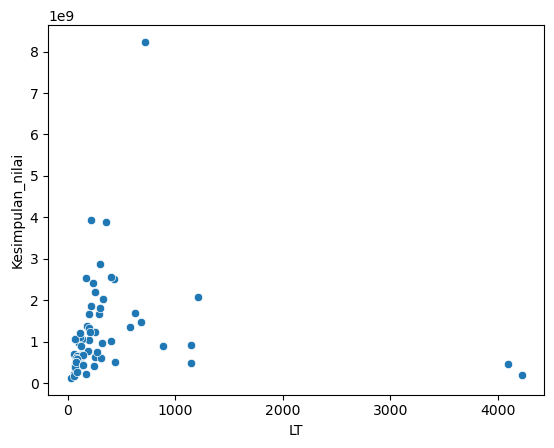

In [11]:
sns.scatterplot(x=df['LT'], y=y)
plt.show()


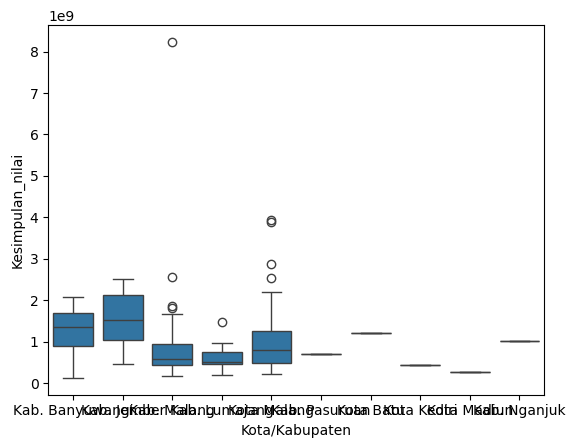

In [12]:
sns.boxplot(x=df['Kota/Kabupaten'], y=y)
plt.show()


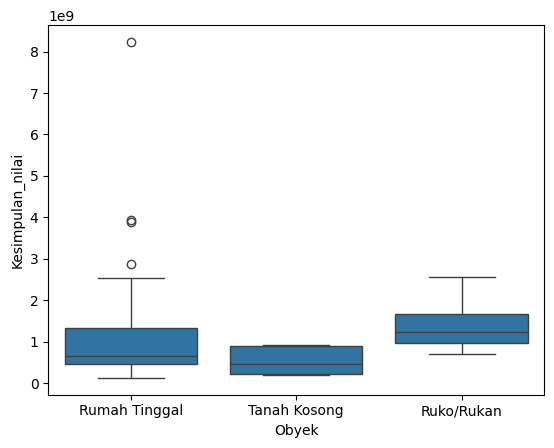

In [13]:
sns.boxplot(x=df["Obyek"], y=y)
plt.show()

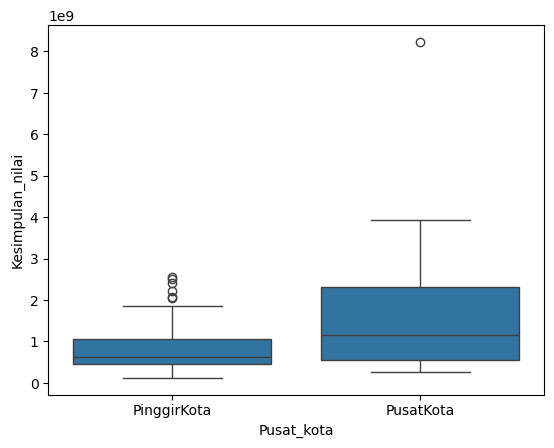

In [14]:
sns.boxplot(x=df["Pusat_kota"], y=y)
plt.show()

In [15]:
correlation_matrix = df[features + ['Kesimpulan_nilai']].corr()
print(correlation_matrix['Kesimpulan_nilai'])


LT                   0.030373
LB                   0.814454
Indikasi_nilai       0.543462
Jumlah_kamar         0.290673
Jumlah_kamarmandi    0.308836
Jumlah_lantai        0.389262
Kesimpulan_nilai     1.000000
Name: Kesimpulan_nilai, dtype: float64


/tmp/ipykernel_17533/371763467.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[features + ['Kesimpulan_nilai']].corr()


## Change data to All INT

In [16]:
##Check Columns Types

X.dtypes

Kota/Kabupaten         int64
LT                     int64
LB                     int64
Tujuan                 int64
Obyek                  int64
Indikasi_nilai       float64
Jumlah_kamar           int64
Jumlah_kamarmandi      int64
Jumlah_lantai          int64
Pusat_kota             int64
dtype: object

In [17]:
y.dtypes

dtype('int64')

# Random Forest Regressor

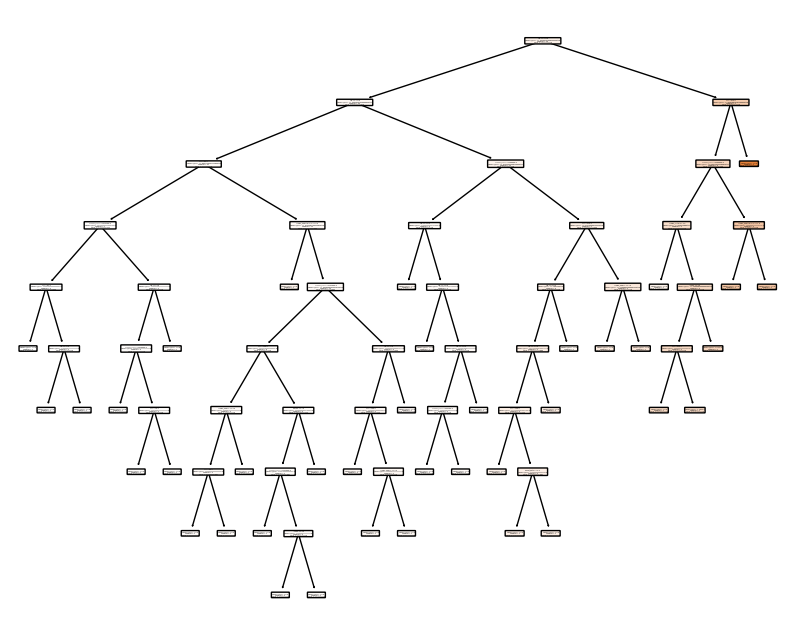

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_regressor.predict(X_test)

# Visualize an individual tree (for example, the first tree)
plt.figure(figsize=(10, 8))
plot_tree(rf_regressor.estimators_[0], feature_names=["Kota/Kabupaten", 
"LT", 
"LB",
"Tujuan",
"Obyek",
"Indikasi_nilai",
"Jumlah_kamar",
"Jumlah_kamarmandi",
"Jumlah_lantai",
"Pusat_kota",
], filled=True, rounded=True)
plt.show()

# Evaluate the model
#rmse = np.sqrt(mean_squared_error(y_test, predictions))
#print(f'Mean Squared Error: {rmse}')

In [19]:
### random forest function

def predict(test_size , model_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Create and train the Random Forest Regressor
    rf_regressor = RandomForestRegressor()
    rf_regressor.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = rf_regressor.predict(X_test)
    
    
    
    dump(rf_regressor, model_name+'.joblib')
    
    

    # Evaluate the model
    #rmse = np.sqrt(mean_squared_error(y_test, predictions))
    #print(f'Mean Squared Error: {rmse}')
    return 0

In [20]:
## run model
#predict(0.1, "Model1")
#predict(0.2, "Model2")
#predict(0.3, "Model3")
#predict(0.4, "Model4")
#predict(0.5, "Model5")

# Check y_test and Predictions

In [21]:
y_test

5     1658100000
36     710000000
11     467700000
1     1692200000
46    1061000000
48     513000000
66     574000000
54    1673000000
51     900000000
29     240000000
68     502000000
71     498000000
19     206400000
13    1348000000
59    1117000000
34    1320000000
Name: Kesimpulan_nilai, dtype: int64

In [22]:
for x in predictions:
    print(x)

1900657000.0
425197000.0
797964500.0
3406444000.0
721365000.0
557310000.0
930176500.0
1402867000.0
665440000.0
337340000.0
442077000.0
515720000.0
753156900.0
2496610500.0
1090845000.0
1872369000.0


In [23]:
predictions

array([1.9006570e+09, 4.2519700e+08, 7.9796450e+08, 3.4064440e+09,
       7.2136500e+08, 5.5731000e+08, 9.3017650e+08, 1.4028670e+09,
       6.6544000e+08, 3.3734000e+08, 4.4207700e+08, 5.1572000e+08,
       7.5315690e+08, 2.4966105e+09, 1.0908450e+09, 1.8723690e+09])

# Evaluation

## Mean Squared Error

In [24]:
# Mean Squared Error
error = abs(y_test - predictions)

total_error = sum(error)
mean_error = total_error / len(y_test)

print("Total Error:")
print(total_error)

print("Mean Error:")
print(mean_error)


Total Error:
6265557400.0
Mean Error:
391597337.5


# 

In [25]:
import numpy as np

# Assuming y_test and predictions are your actual and predicted values
percentage_error = (   abs(y_test - predictions) / y_test) * 100

mean_percentage_error = np.mean(percentage_error)

print("Mean Percentage Error:")
print(mean_percentage_error)

Mean Percentage Error:
51.369934357994914


In [26]:
(sum(error)/sum(y_test))*100

43.269228750587004

In [27]:
total_percentage_error = (np.sum(error) / np.sum(y_test)) * 100

print("Error to Total Test Value")
print(total_percentage_error)

Error to Total Test Value
43.269228750587004


# Compare to linier regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
predictlinier = linear_reg_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, predictlinier))
print(f'Mean Squared Error: {rmse}')

In [ ]:
error2 = abs(y_test - predictlinier)

total_error2 = sum(error2)
mean_error2 = total_error2 / len(y_test)

print("Total Error:")
print(total_error2)

print("Mean Error:")
print(mean_error2)

In [ ]:
predictions